In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
os.getcwd()

'/Users/ryanfisher/Documents/Springboard/Springboard/relax_challenge'

In [3]:
os.listdir()

['Untitled.ipynb',
 'takehome_users.csv',
 'relax_data_science_challenge.pdf',
 '.ipynb_checkpoints',
 'takehome_user_engagement.csv']

In [5]:
df = pd.read_csv('takehome_users.csv',encoding='latin-1')
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [24]:
df2 = pd.read_csv('takehome_user_engagement.csv', encoding='latin-1')
df2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [35]:
df2['time_stamp'] = pd.to_datetime(df2['time_stamp']) - pd.to_timedelta(7, unit='d')

In [7]:
df.shape

(12000, 10)

In [8]:
df2.shape

(207917, 3)

In [14]:
df2['visited'].value_counts()

1    207917
Name: visited, dtype: int64

In [33]:
df2_stats = pd.Series([])

/Users/ryanfisher/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [36]:
days = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
for day in days:
    k = df2.groupby(['user_id', pd.Grouper(key='time_stamp', freq='W-' + day)])['visited'].count().reset_index().sort_values('user_id')
    k = k.groupby('user_id')['visited'].max()
    if len(df2_stats) == 0:
        df2_stats = k
    else:
        df2_stats = pd.DataFrame([df2_stats, k]).max()

In [37]:
df2_stats

user_id
1        1
2        3
3        1
4        1
5        1
        ..
11996    1
11997    1
11998    1
11999    1
12000    1
Length: 8823, dtype: int64

In [39]:
df['adopted_user'] = df['object_id'].apply(lambda x: 1 if x in df2_stats and df2_stats[x] >= 3 else 0)

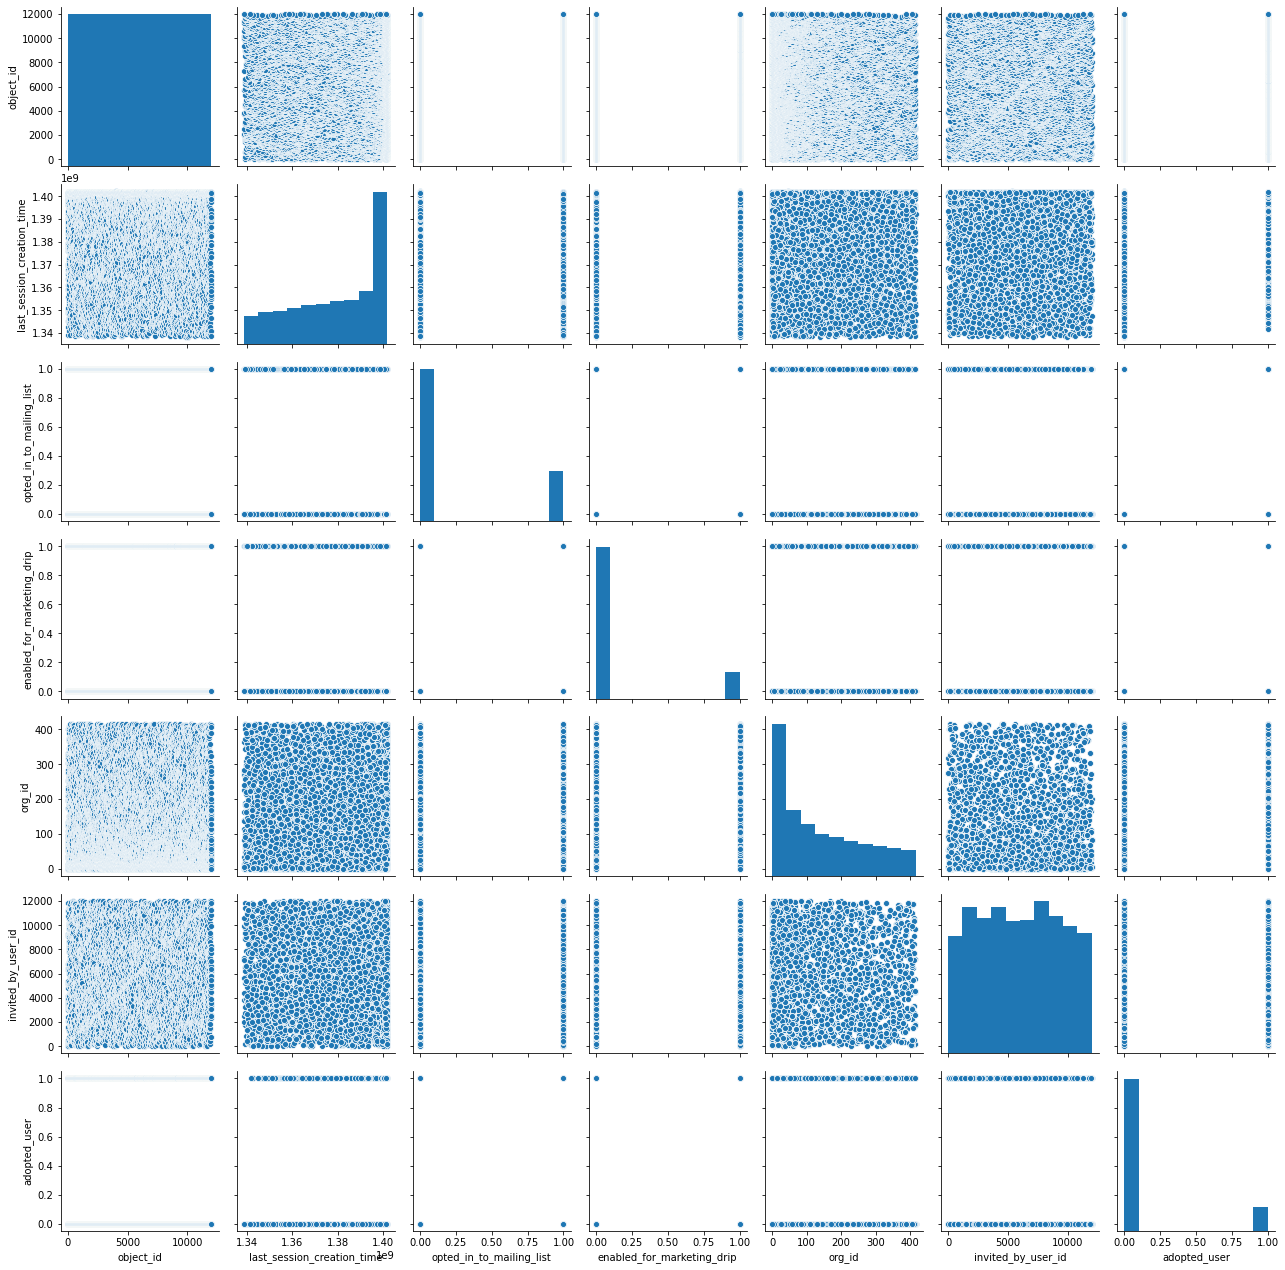

In [40]:
sns.pairplot(df)

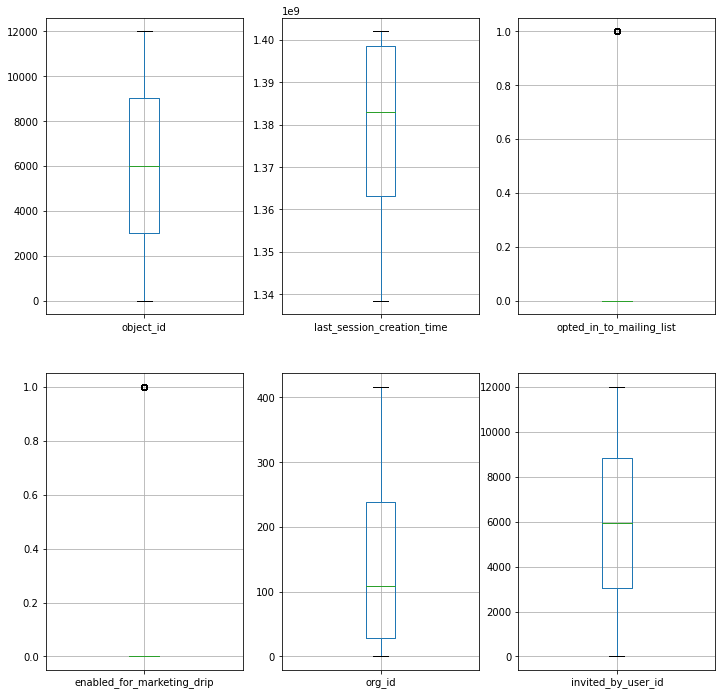

In [43]:
cols = df.select_dtypes([np.float64,np.int64]).columns

fig, axes = plt.subplots(len(cols)//3, 3, figsize=(12, 12))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df.boxplot(column = cols[i],  ax=axis)
        i = i+1

In [46]:
corr = df.corr()
#plot it in the next line
corr.round(2).style.background_gradient()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
object_id,1.000000,0.020000,-0.030000,-0.020000,0.000000,0.020000,0.010000
last_session_creation_time,0.020000,1.000000,0.010000,0.010000,0.040000,0.010000,0.400000
opted_in_to_mailing_list,-0.030000,0.010000,1.000000,0.480000,0.000000,0.000000,0.010000
enabled_for_marketing_drip,-0.020000,0.010000,0.480000,1.000000,0.010000,0.000000,0.000000
org_id,0.000000,0.040000,0.000000,0.010000,1.000000,-0.060000,0.060000
invited_by_user_id,0.020000,0.010000,0.000000,0.000000,-0.060000,1.000000,0.000000
adopted_user,0.010000,0.400000,0.010000,0.000000,0.060000,0.000000,1.000000


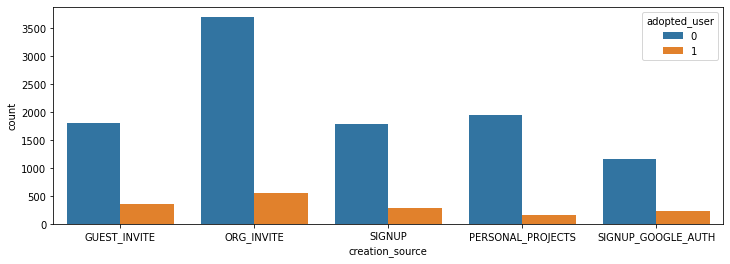

In [49]:
plt.figure(figsize=(12,4))
sns.countplot(x='creation_source', data=df, hue='adopted_user')

In [57]:
df['invited_user'] = df['invited_by_user_id'].notnull()

In [58]:
df['invited_user'] = (df['invited_user']).astype(int)

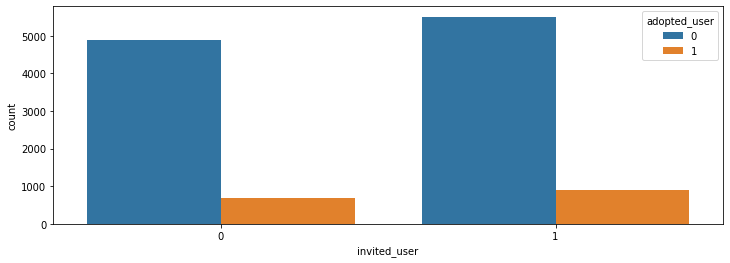

In [61]:
plt.figure(figsize=(12,4))
sns.countplot(x='invited_user', data=df, hue='adopted_user')

In [64]:
corr = df.corr()
corr.round(2).style.background_gradient()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,invited_user
object_id,1.000000,0.020000,-0.030000,-0.020000,0.000000,0.020000,0.010000,-0.010000
last_session_creation_time,0.020000,1.000000,0.010000,0.010000,0.040000,0.010000,0.400000,0.000000
opted_in_to_mailing_list,-0.030000,0.010000,1.000000,0.480000,0.000000,0.000000,0.010000,0.010000
enabled_for_marketing_drip,-0.020000,0.010000,0.480000,1.000000,0.010000,0.000000,0.000000,0.000000
org_id,0.000000,0.040000,0.000000,0.010000,1.000000,-0.060000,0.060000,-0.020000
invited_by_user_id,0.020000,0.010000,0.000000,0.000000,-0.060000,1.000000,0.000000,nan
adopted_user,0.010000,0.400000,0.010000,0.000000,0.060000,0.000000,1.000000,0.030000
invited_user,-0.010000,0.000000,0.010000,0.000000,-0.020000,nan,0.030000,1.000000


Looking at the correlation plot, the last session (login time) is the most correlated field to adopted user. This should be used to help predict if a user will be converted. Also, an invited user has a higher chance of being adopted.